## Mini-Challenge: Querying and Plotting WILD Token Prices

In this mini-challenge, you’ll use the CoinGecko API to fetch price data for the WILD token and plot its price over time using the matplotlib library.

In [4]:
import requests
import matplotlib.pyplot as plt
import datetime

from pandas import DataFrame
import numpy as np

In [5]:
# Function to fetch the historical price of WILD in USD
def fetch_wild_price_data(num_days=10):
    url = f"https://api.coingecko.com/api/v3/coins/wilder-world/market_chart?vs_currency=usd&days={num_days}&interval=daily"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data['prices']
        
    else:
        print(f"Error: {response.status_code}")
        return None

    

In [6]:
# Plot wild price against date. This function expects a dictionary with the dates as keys and price as values
def plot_wild_price(data):
    dates = list(data.keys())
    prices = list(data.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, marker='o')
    plt.title('WILD Price vs Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
# Convert a unix timestamp (in millisec) to datetime
def convert_unix_timestamp_to_datetime(timestamp):
    return datetime.datetime.fromtimestamp(timestamp/1000)

## Write a function that will plot the price of WILD for the last 20 days!

Some hints

- Coingecko returns price data as a list of lists like this:

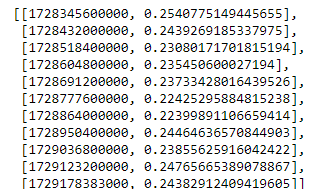

- The numbers on the left are unix timestamps. You need to convert them to datetime using the ``convert_unix_timestamp_to_datetime`` function
- You need to convert this data into a dictionary before passing this dictionary into ``plot_wild_price``
- Remember we need 20 days of price data, this is not the default if you call ``fetch_wild_price_data`` without any arguments

### Submission

Use your own GitHub account to submit, by creating a pull request to my repo with your changes.
First to submit a working pull request wins!

See this guide on how to do this
https://codex.so/fork-and-pull-en



WILD Token Price Data:
               Date    Price
2024-10-31 00:00:00 0.229876
2024-11-01 00:00:00 0.218921
2024-11-02 00:00:00 0.218294
2024-11-03 00:00:00 0.216719
2024-11-04 00:00:00 0.215474
2024-11-05 00:00:00 0.212172
2024-11-06 00:00:00 0.214774
2024-11-07 00:00:00 0.236462
2024-11-08 00:00:00 0.249415
2024-11-09 00:00:00 0.247623
2024-11-10 00:00:00 0.261102
2024-11-11 00:00:00 0.294785
2024-11-12 00:00:00 0.340964
2024-11-13 00:00:00 0.322756
2024-11-14 00:00:00 0.297815
2024-11-15 00:00:00 0.267658
2024-11-16 00:00:00 0.246063
2024-11-17 00:00:00 0.245869
2024-11-18 00:00:00 0.245700
2024-11-19 00:00:00 0.243254
2024-11-19 23:10:46 0.242114


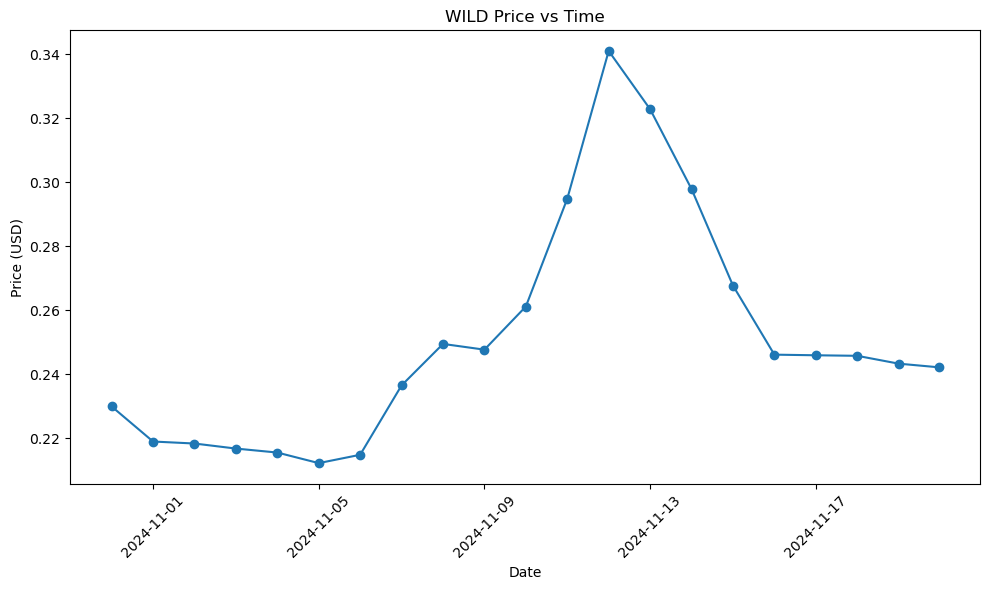

In [8]:
# Fetch 20 days of price data
price_data = fetch_wild_price_data(20)

if price_data is None:
    print("Failed to fetch price data")
else:
    # Convert the data into a dictionary with datetime keys and price values
    price_dict = {
        convert_unix_timestamp_to_datetime(timestamp): price 
        for timestamp, price in price_data
    }
    
    # Sort the dictionary by date
    price_dict = dict(sorted(price_dict.items()))
    
    # Create a DataFrame for better data visualization
    df = DataFrame(list(price_dict.items()), columns=['Date', 'Price'])
    print("\nWILD Token Price Data:")
    print(df.to_string(index=False))
    
    # Plot the data
    plot_wild_price(price_dict)

In [9]:
# Plot WILD price against date with moving averages
def plot_wild_price_with_moving_avg(data, window=7):
    
    # Convert dictionary to sorted lists for plotting
    dates = list(data.keys())
    prices = list(data.values())
    
    # Calculate Moving Average
    prices_array = np.array(prices, dtype=np.float32)
    moving_avg = np.convolve(prices_array, np.ones(window) / window, mode='valid')
    
    # Adjust dates for the moving average (it has fewer points due to windowing)
    moving_avg_dates = dates[window - 1:]
    
    # Plot the prices and moving average
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, marker='o', label='Actual Price')
    plt.plot(moving_avg_dates, moving_avg, marker='o', linestyle='--', color='orange', label=f'{window}-Day SMA')
    
    plt.title('WILD Price vs Time with Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


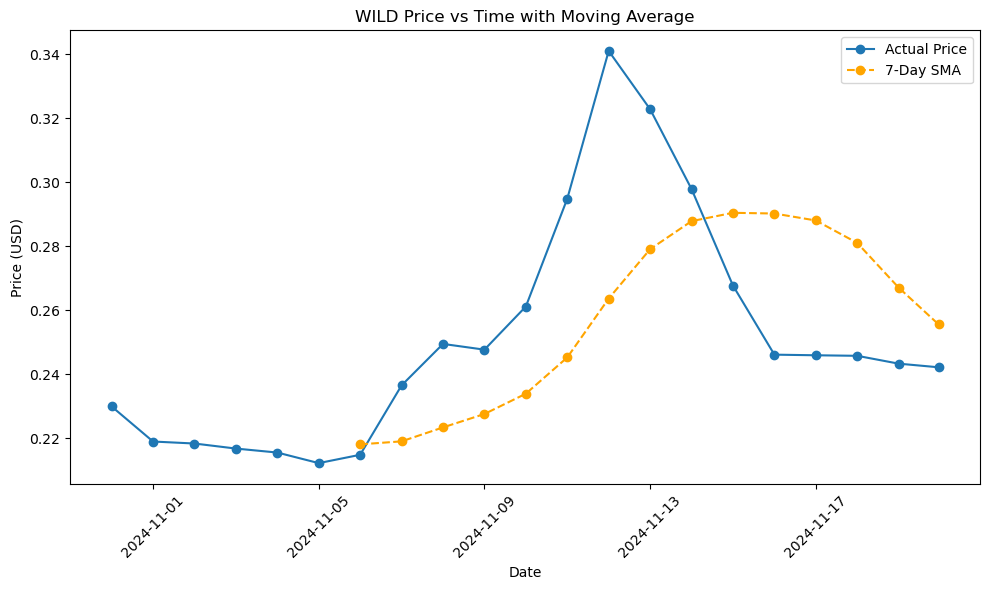

In [10]:
plot_wild_price_with_moving_avg(price_dict)